# Comparative Analysis of RNN Architectures for Sequence Modeling: Stacked RNNs, Bi-Directional RNNs, and CNN-RNN Hybrids

# PART-1 

1. **What are Recurrent Neural Networks (RNNs), and how do they differ from traditional feedforward neural networks?**
   - RNNs are designed to handle sequential data by maintaining a hidden state that evolves over time, allowing the network to retain information from previous time steps. Unlike traditional feedforward neural networks, RNNs can use the information from past inputs, making them suitable for tasks like time series prediction and language modeling.

   **How does an RNN pass information through the network over time?**
   - RNNs pass information through the network by updating the hidden state at each time step. The hidden state is influenced by both the current input and the previous hidden state, allowing the model to keep track of context over time.

2. **What are the advantages and potential drawbacks of stacking RNN layers?**
   - *Advantages*: Stacking RNN layers allows the network to capture more complex and hierarchical patterns in the data by adding multiple layers of temporal processing.
   - *Drawbacks*: Stacking can lead to challenges like vanishing gradients, making it harder for the network to learn long-term dependencies. It also increases the complexity and training time.

   **What are Bi-directional RNNs, and how do they enhance the performance of sequence models?**
   - Bi-directional RNNs process data in both forward and backward directions. This allows the model to utilize both past and future context, leading to improved performance in tasks where understanding the entire sequence, such as speech recognition or sentiment analysis, is critical.

3. **What is a hybrid architecture in the context of sequence modeling?**
   - A hybrid architecture combines RNNs with other models to leverage their strengths. For instance, a CNN-RNN hybrid might use CNNs to extract spatial features from images or videos, while RNNs handle the sequential or temporal aspects. This combination enhances performance in tasks like video processing and caption generation.

4. **What are the different types of RNN models, and how do they differ from a basic RNN?**
   - **LSTM (Long Short-Term Memory)**: LSTMs include mechanisms to retain information over longer sequences by using gates to control the flow of information, solving the vanishing gradient problem.
   - **GRU (Gated Recurrent Unit)**: A simplified version of LSTM, GRUs combine the forget and input gates, making them computationally faster while still addressing the vanishing gradient issue.
   - **Bi-directional RNN**: Allows the model to process information in both forward and backward directions, improving performance by capturing context from both past and future.
   - **Deep RNN**: Multiple RNN layers stacked on top of each other to capture deeper patterns, though it can suffer from training difficulties due to vanishing gradients.

# PART-2

## Step-1: Preprocessing and exploration

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load IMDb dataset
max_features = 10000  # Number of words to consider as features
maxlen = 100  # Cut texts after this number of words (for padding)
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to have consistent length
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


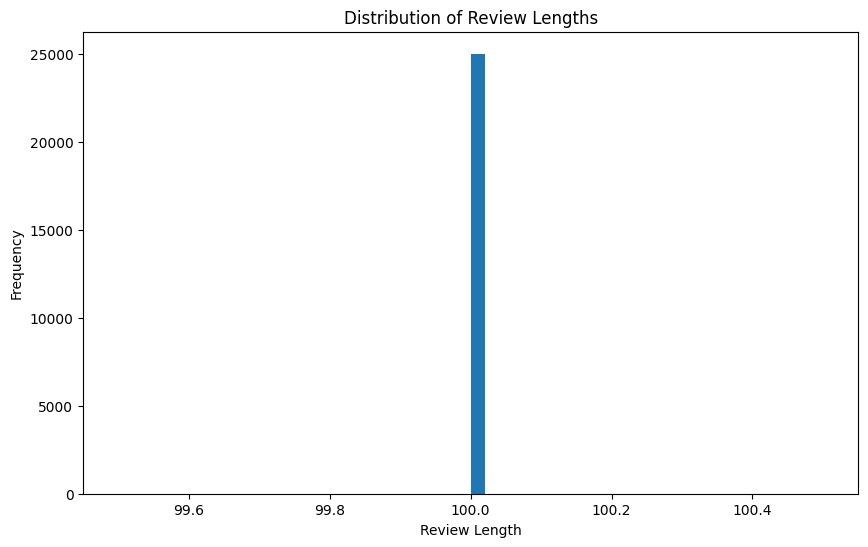

In [2]:
review_lengths = [len(review) for review in input_train]

plt.figure(figsize=(10,6))
plt.hist(review_lengths, bins=50)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


## Step-2: Implementing the Basic RNN Model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# Define the model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.6169 - loss: 0.6285 - val_accuracy: 0.8066 - val_loss: 0.4350
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8489 - loss: 0.3595 - val_accuracy: 0.8058 - val_loss: 0.4120
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8819 - loss: 0.2887 - val_accuracy: 0.8318 - val_loss: 0.3917
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9206 - loss: 0.2126 - val_accuracy: 0.8126 - val_loss: 0.4255
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9398 - loss: 0.1643 - val_accuracy: 0.8198 - val_loss: 0.4644
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9644 - loss: 0.1050 - val_accuracy: 0.8150 - val_loss: 0.5130
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9785 - loss: 0.0667 - val_accuracy: 0.7970 - val_loss: 0.5909
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9865 - loss: 0.0409 - val

## Step-3: Visualizing Loss and Accuracy

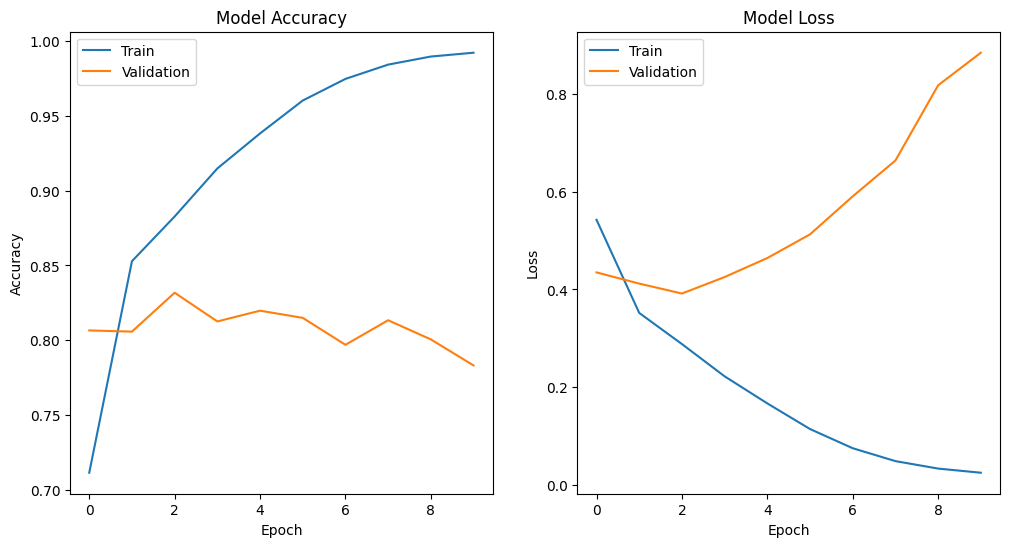

In [4]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Step 4: Evaluating the Model and Confusion Matrix

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7873 - loss: 0.8993
Test Accuracy: 0.7897999882698059
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


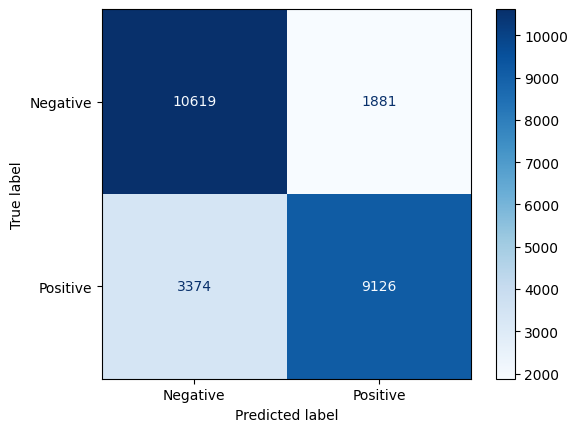

In [5]:
# Evaluate the model on test set
test_loss, test_acc = model.evaluate(input_test, y_test)
print(f"Test Accuracy: {test_acc}")

# Predict the labels for the test set
y_pred = (model.predict(input_test) > 0.5).astype("int32")

# Compute and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.show()


## Step 5: Implementing Stacked RNN Model

In [6]:
from tensorflow.keras.layers import SimpleRNN

stacked_rnn_model = Sequential()
stacked_rnn_model.add(Embedding(max_features, 32))
stacked_rnn_model.add(SimpleRNN(32, return_sequences=True))  # First RNN layer
stacked_rnn_model.add(SimpleRNN(32))  # Second RNN layer
stacked_rnn_model.add(Dense(1, activation='sigmoid'))

stacked_rnn_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_stacked = stacked_rnn_model.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.6370 - loss: 0.5981 - val_accuracy: 0.8272 - val_loss: 0.4016
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.8480 - loss: 0.3653 - val_accuracy: 0.8338 - val_loss: 0.3874
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8802 - loss: 0.2967 - val_accuracy: 0.8306 - val_loss: 0.3866
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9117 - loss: 0.2358 - val_accuracy: 0.8368 - val_loss: 0.4103
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9274 - loss: 0.1929 - val_accuracy: 0.8378 - val_loss: 0.4614
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9494 - loss: 0.1437 - val_accuracy: 0.7970 - val_loss: 0.4975
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9621 - loss: 0.1106 - val_accuracy: 0.8092 - val_loss: 0.5562
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.9726 - loss: 0.0806 - 

## Step 6: Implementing Bi-Directional RNN Model

In [7]:
from tensorflow.keras.layers import Bidirectional

bi_rnn_model = Sequential()
bi_rnn_model.add(Embedding(max_features, 32))
bi_rnn_model.add(Bidirectional(SimpleRNN(32)))  # Bi-directional RNN
bi_rnn_model.add(Dense(1, activation='sigmoid'))

bi_rnn_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_bi_rnn = bi_rnn_model.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5830 - loss: 0.6530 - val_accuracy: 0.8230 - val_loss: 0.4041
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.8519 - loss: 0.3573 - val_accuracy: 0.8290 - val_loss: 0.3843
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.8958 - loss: 0.2594 - val_accuracy: 0.8336 - val_loss: 0.4179
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9353 - loss: 0.1721 - val_accuracy: 0.8330 - val_loss: 0.4205
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9672 - loss: 0.0963 - val_accuracy: 0.8044 - val_loss: 0.5470
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9856 - loss: 0.0471 - val_accuracy: 0.8094 - val_loss: 0.6300
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9930 - loss: 0.0212 - val_accuracy: 0.7738 - val_loss: 0.7868
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9956 - loss: 0.0151 - 

## Step 7: Implementing Hybrid CNN-RNN Model

In [9]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

hybrid_model = Sequential()
hybrid_model.add(Embedding(max_features, 32))
hybrid_model.add(Conv1D(32, 7, activation='relu'))  # CNN Layer
hybrid_model.add(MaxPooling1D(5))
hybrid_model.add(SimpleRNN(32))  # RNN Layer
hybrid_model.add(Dense(1, activation='sigmoid'))

hybrid_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_hybrid = hybrid_model.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6124 - loss: 0.6214 - val_accuracy: 0.8274 - val_loss: 0.3904
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8627 - loss: 0.3269 - val_accuracy: 0.8322 - val_loss: 0.3766
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9260 - loss: 0.1984 - val_accuracy: 0.8246 - val_loss: 0.4074
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9746 - loss: 0.0855 - val_accuracy: 0.8102 - val_loss: 0.5351
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9914 - loss: 0.0284 - val_accuracy: 0.7878 - val_loss: 0.7929
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9971 - loss: 0.0107 - val_accuracy: 0.7756 - val_loss: 0.9779
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9982 - loss: 0.0057 - val_accuracy: 0.7802 - val_loss: 1.0911
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9994 - loss: 0.0024 - val_accuracy: 0.

## Step 8: Performance Comparison

In [10]:
# Basic RNN Evaluation
print(f"Test Accuracy - Basic RNN: {test_acc}")

# Stacked RNN Evaluation
stacked_test_loss, stacked_test_acc = stacked_rnn_model.evaluate(input_test, y_test)
print(f"Test Accuracy - Stacked RNN: {stacked_test_acc}")

# Bi-Directional RNN Evaluation
bi_rnn_test_loss, bi_rnn_test_acc = bi_rnn_model.evaluate(input_test, y_test)
print(f"Test Accuracy - Bi-Directional RNN: {bi_rnn_test_acc}")

# Hybrid CNN-RNN Evaluation
hybrid_test_loss, hybrid_test_acc = hybrid_model.evaluate(input_test, y_test)
print(f"Test Accuracy - Hybrid CNN-RNN: {hybrid_test_acc}")


Test Accuracy - Basic RNN: 0.7897999882698059
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7977 - loss: 0.8291
Test Accuracy - Stacked RNN: 0.7980800271034241
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8055 - loss: 1.0377
Test Accuracy - Bi-Directional RNN: 0.8056399822235107
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7881 - loss: 1.3423
Test Accuracy - Hybrid CNN-RNN: 0.7879999876022339


## Confusion matrix for Stacked RNN

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7977 - loss: 0.8291
Test Accuracy - Stacked RNN: 0.7980800271034241
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step


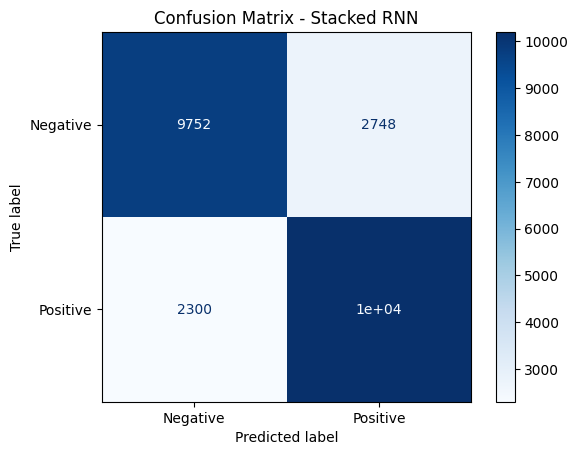

In [11]:
# Evaluate the Stacked RNN Model on the test set
stacked_test_loss, stacked_test_acc = stacked_rnn_model.evaluate(input_test, y_test)
print(f"Test Accuracy - Stacked RNN: {stacked_test_acc}")

# Predict the labels for the test set using the Stacked RNN
stacked_y_pred = (stacked_rnn_model.predict(input_test) > 0.5).astype("int32")

# Compute and display confusion matrix for Stacked RNN
stacked_conf_matrix = confusion_matrix(y_test, stacked_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=stacked_conf_matrix, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Stacked RNN")
plt.show()


## Confusion matrix for Bi-Directional RNN

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8055 - loss: 1.0377
Test Accuracy - Bi-Directional RNN: 0.8056399822235107
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step


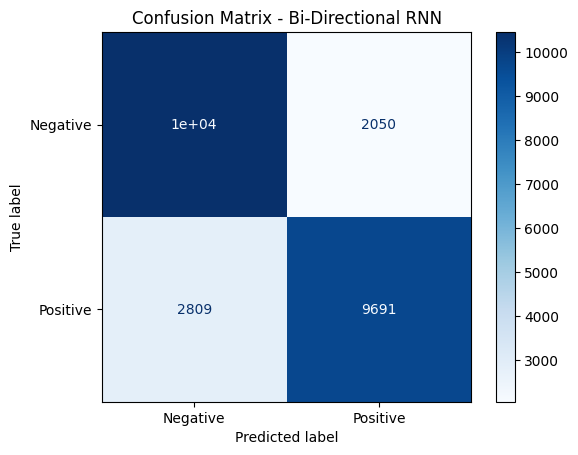

In [12]:
# Evaluate the Bi-Directional RNN Model on the test set
bi_rnn_test_loss, bi_rnn_test_acc = bi_rnn_model.evaluate(input_test, y_test)
print(f"Test Accuracy - Bi-Directional RNN: {bi_rnn_test_acc}")

# Predict the labels for the test set using the Bi-Directional RNN
bi_rnn_y_pred = (bi_rnn_model.predict(input_test) > 0.5).astype("int32")

# Compute and display confusion matrix for Bi-Directional RNN
bi_rnn_conf_matrix = confusion_matrix(y_test, bi_rnn_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=bi_rnn_conf_matrix, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Bi-Directional RNN")
plt.show()


## Confusion Matrix for Hybrid CNN-RNN Model

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7881 - loss: 1.3423
Test Accuracy - Hybrid CNN-RNN: 0.7879999876022339
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


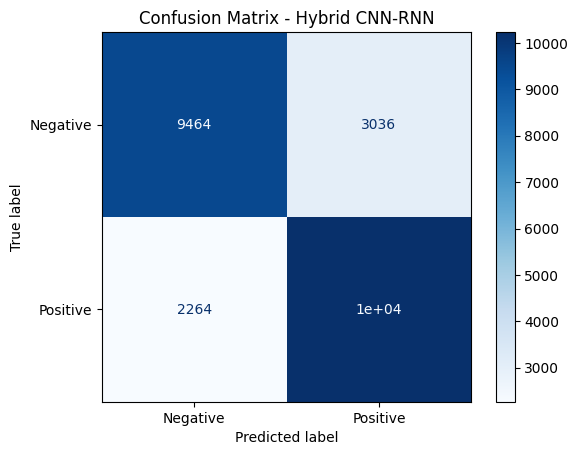

In [13]:
# Evaluate the Hybrid CNN-RNN Model on the test set
hybrid_test_loss, hybrid_test_acc = hybrid_model.evaluate(input_test, y_test)
print(f"Test Accuracy - Hybrid CNN-RNN: {hybrid_test_acc}")

# Predict the labels for the test set using the Hybrid CNN-RNN
hybrid_y_pred = (hybrid_model.predict(input_test) > 0.5).astype("int32")

# Compute and display confusion matrix for Hybrid CNN-RNN
hybrid_conf_matrix = confusion_matrix(y_test, hybrid_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=hybrid_conf_matrix, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Hybrid CNN-RNN")
plt.show()
